In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [2]:
table1 = pd.read_csv('US_Accidents_June20_CA.csv')

In [3]:
table1.head()

,Airport Code,Amenity,Astronomical Twilight,Bump,City,Civil Twilight,Country,County,Crossing,Description,...,Precipitation(in),Pressure(in),Severity,Start Lat,Start Lng,Temperature(F),TMC,Visibility(mi),Wind Chill(F),Wind Speed(mph)
0,KGOO,伪,Day,伪,Grass Valley,Day,US,Nevada,伪,Accident on Airport Ave in Grass Valley.,...,NaN,NaN,1,39.114155,-121.054054,NaN,201.0,NaN,NaN,NaN
1,KSEE,伪,Day,伪,Spring Valley,Day,US,San Diego,伪,Accident on Date St in San Diego.,...,NaN,30.05,1,32.720226,-116.993698,NaN,201.0,10.0,NaN,NaN
2,KL35,伪,Day,伪,Lucerne Valley,Day,US,San Bernardino,伪,Accident on Martellen Ln both ways at Christen...,...,NaN,30.31,1,34.457775,-116.976364,59.0,201.0,10.0,NaN,NaN
3,KVNY,伪,Day,伪,Tarzana,Day,US,Los Angeles,伪,Accident on Hatteras St in Tarzana.,...,0.1,30.00,1,34.177456,-118.533005,55.0,201.0,1.0,NaN,3.5
4,KMER,伪,Day,伪,Atwater,Day,US,Merced,伪,Accident on De la Vina Ct at Santa Ynez Ct.,...,NaN,29.92,1,37.348450,-120.569313,55.4,201.0,10.0,NaN,17.3


In [4]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816825 entries, 0 to 816824
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Airport Code           816497 non-null  object 
 1   Amenity                816825 non-null  object 
 2   Astronomical Twilight  816817 non-null  object 
 3   Bump                   816825 non-null  object 
 4   City                   816817 non-null  object 
 5   Civil Twilight         816817 non-null  object 
 6   Country                816825 non-null  object 
 7   County                 816825 non-null  object 
 8   Crossing               816825 non-null  object 
 9   Description            816825 non-null  object 
 10  End Lat                330882 non-null  float64
 11  End Lng                330882 non-null  float64
 12  End Time               816825 non-null  object 
 13  Give Way               816825 non-null  object 
 14  ID                     816825 non-nu

In [4]:
table1.groupby('Severity').count()

,Airport Code,Amenity,Astronomical Twilight,Bump,City,Civil Twilight,Country,County,Crossing,Description,...,Humidity(%),Precipitation(in),Pressure(in),Start Lat,Start Lng,Temperature(F),TMC,Visibility(mi),Wind Chill(F),Wind Speed(mph)
Severity,,,,,,,,,,,,,,,,,,,,,
1,5791,5801,5801,5801,5801,5801,5801,5801,5801,5801,...,5676,4694,5690,5801,5801,5685,265,5685,5452,5611
2,576484,576742,576734,576742,576734,576734,576742,576742,576742,576742,...,561734,269878,566108,576742,576742,562823,280014,564737,281559,494713
3,225765,225820,225820,225820,225820,225820,225820,225820,225820,225820,...,220206,53191,221963,225820,225820,220466,205225,221561,48836,176390
4,8457,8462,8462,8462,8462,8462,8462,8462,8462,8462,...,8199,3549,8281,8462,8462,8217,439,8248,3688,6726


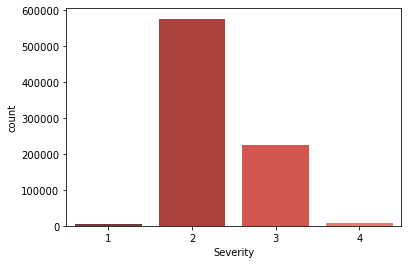

In [5]:
sns.countplot(x='Severity', data=table1, palette="Reds_d")

In [6]:
model = table1.drop(['ID','Source','Wind Direction','State','Street','Number','Bump','Roundabout','Station','Stop','Distance(mi)','Railway','Traffic Calming','Traffic Signal','Turning Loop','Civil Twilight','Nautical Twilight','Crossing','Junction','Amenity','Give Way','No Exit','Weather Timestamp','Astronomical Twilight', 'Side','City', 'TMC','Country','County', 'Description','Airport Code','Timezone', 'Sunrise Sunset', 'Start Lat','Start Lng','Zipcode','Start Time','End Lat','End Lng','End Time'], axis=1)

In [8]:
model.head()

,Weather Condition,Humidity(%),Precipitation(in),Pressure(in),Severity,Temperature(F),Visibility(mi),Wind Chill(F),Wind Speed(mph)
0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1,Clear,NaN,NaN,30.05,1,NaN,10.0,NaN,NaN
2,Clear,59.0,NaN,30.31,1,59.0,10.0,NaN,NaN
3,Light Rain,100.0,0.1,30.00,1,55.0,1.0,NaN,3.5
4,Overcast,NaN,NaN,29.92,1,55.4,10.0,NaN,17.3


In [9]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816825 entries, 0 to 816824
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Weather Condition  800434 non-null  object 
 1   Humidity(%)        795815 non-null  float64
 2   Precipitation(in)  331312 non-null  float64
 3   Pressure(in)       802042 non-null  float64
 4   Severity           816825 non-null  int64  
 5   Temperature(F)     797191 non-null  float64
 6   Visibility(mi)     800231 non-null  float64
 7   Wind Chill(F)      339535 non-null  float64
 8   Wind Speed(mph)    683440 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 56.1+ MB


In [7]:
from xgboost import XGBClassifier
num_round = 20
bst1 =XGBClassifier(max_depth=2, learning_rate=1, n_estimators=num_round,
                   silent=True, objective='multi:softmax')

In [8]:
model1 = pd.get_dummies(model, columns=['Weather Condition'], drop_first=True)

In [35]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816825 entries, 0 to 816824
Data columns (total 79 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Humidity(%)                                     795815 non-null  float64
 1   Precipitation(in)                               331312 non-null  float64
 2   Pressure(in)                                    802042 non-null  float64
 3   Severity                                        816825 non-null  int64  
 4   Temperature(F)                                  797191 non-null  float64
 5   Visibility(mi)                                  800231 non-null  float64
 6   Wind Chill(F)                                   339535 non-null  float64
 7   Wind Speed(mph)                                 683440 non-null  float64
 8   Weather Condition_Blowing Dust / Windy          816825 non-null  uint8  
 9   Weather Condition_Blowing 

In [10]:
y_xgtrain = model1['Severity']
x_xgtrain=model1.drop(['Severity'],axis=1)

In [11]:
bst1.fit(x_xgtrain, y_xgtrain)

[10:22:14] WARNING: D:\Build\xgboost\xgboost-1.2.1.git\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

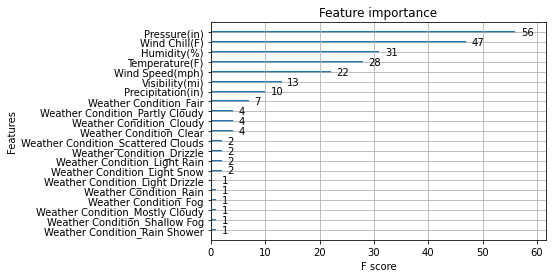

In [14]:
from xgboost import plot_importance 
from matplotlib import pyplot
plot_importance(bst1)
pyplot.show()

In [12]:
model1.loc[(model1['Severity']<=2),'Severity']=0
model1.loc[(model1['Severity']>=2),'Severity']=1

In [13]:
from sklearn.model_selection import train_test_split

In [38]:
y = model1['Severity']
x = model1.drop(['Severity'], axis=1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [41]:
lg = LogisticRegression(C=100, solver = 'lbfgs', max_iter = 1000)
lg.fit(x_train_s, y_train)

LogisticRegression(C=100, max_iter=1000)

In [42]:
y_predict_test = lg.predict(x_test_s)

In [29]:
y_test

754110    0
695004    0
528527    0
709736    1
242908    1
         ..
570389    0
133690    1
460825    0
445368    0
503573    0
Name: Severity, Length: 163365, dtype: int64

In [43]:
predict_prob = lg.predict_proba(x_test_s)
predict_prob[:, 1]

array([0.12813241, 0.37151398, 0.40394644, ..., 0.41097255, 0.20070132,
       0.17900767])

In [44]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:, 1])
print('AUC: {:.2f}'.format(auc(fpr, tpr)))

AUC: 0.65


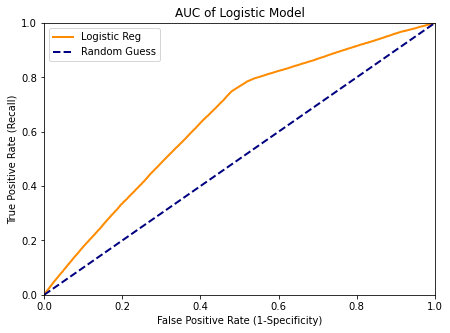

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'Logistic Reg')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('AUC of Logistic Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show();

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true=y_test, y_pred=y_predict_test)
print('confusion matrix:\n', cm)

confusion matrix:
 [[116572     26]
 [ 46750     17]]


In [23]:
tn, fp, fn, tp = cm.ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')

tn: 116598, fp: 0, fn: 46767, tp: 0


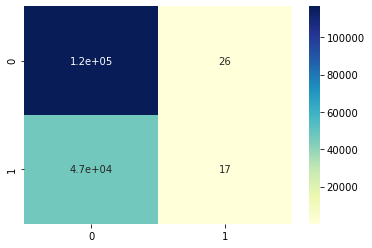

In [47]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cm), annot = True, cmap="YlGnBu")

In [48]:
print('classification report:\n', classification_report(y_test, y_predict_test))

classification report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83    116598
           1       0.40      0.00      0.00     46767

    accuracy                           0.71    163365
   macro avg       0.55      0.50      0.42    163365
weighted avg       0.62      0.71      0.59    163365



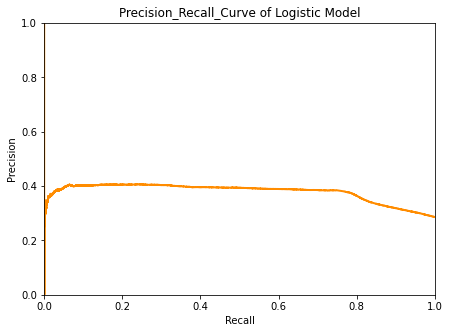

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, predict_prob[:,1] )

plt.figure(figsize = (7, 5))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall_Curve of Logistic Model')
plt.show();

In [26]:
print('classifier accuracy is {:.2f}'.format(lg.score(x_test_s, y_test)))

classifier accuracy is 0.71


In [27]:
from sklearn.metrics import accuracy_score
print('classifier accuracy is {:.2f}'.format(accuracy_score(y_true=y_test, y_pred=y_predict_test)))

classifier accuracy is 0.71


In [28]:
lg.coef_

array([[-0.02575601, -0.59501472,  0.08309354,  0.14324511, -0.01897778]])

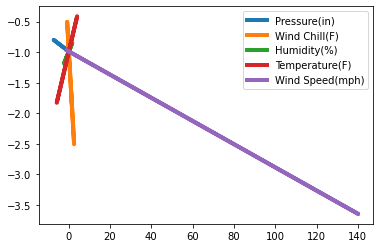

In [59]:
plt.plot(x_test_s, lg.coef_ * x_test_s + lg.intercept_, linewidth=4)
plt.legend(['Pressure(in)','Wind Chill(F)','Humidity(%)','Temperature(F)','Wind Speed(mph)'])